# Dog vs Cat Convolution Neural Network Classifier

### Problem statement :

In this Section we are implementing Convolution Neural Network(CNN) Classifier for Classifying dog and cat images. The Total number of images available for training is 25,000 and final testing is done on seperate 10,000 images.
#### Note:This problem statement and dataset is taken from [this](https://www.kaggle.com/c/dogs-vs-cats) Kaggle competition.

### Dependencies
* Jupyter notebook
* Tensorflow 1.10
* Python 3.6
* Matplotlib
* Seaborn
* Scikit-Learn
* Pandas
* Numpy

Install dependencies using [conda](https://conda.io/docs/)

#### Test Train Split
Image training set contain 12500 images for each category. I split those into 80% train and 20% means test Split each class images into 10,000 for train and 2,500 for test. 

### Architecture
![image](resources/architecture.jpg)

In [1]:

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

Network Parameter:
* Rectifier Linear Unit 
* Adam optimizer
* Sigmoid on Final output
* Binary CrossEntropy loss

In [3]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

2022-06-15 20:50:50.833046: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-15 20:50:54.035710: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14701 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5
2022-06-15 20:50:54.038972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10752 MB memory:  -> device: 1, name: Quadro RTX 5000, pci bus id: 0000:73:00.0, compute capability: 7.5
2022-06-15 20:50:54.041878: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica

## Data Augmentation
Using some Data Augmentation techniques for more data and Better results.
* Shearing of images
* Random zoom
* Horizontal flips

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True, 
                                  rotation_range = 180,
                                  vertical_flip =True)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size =128
#Training Set
train_set = train_datagen.flow_from_directory('train',
                                             target_size=(64,64),
                                             batch_size=batch_size,
                                             class_mode='binary')
#Validation Set
test_set = test_datagen.flow_from_directory('test',
                                           target_size=(64,64),
                                           batch_size = batch_size,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('test1',
                                            target_size=(64,64),
                                            batch_size=batch_size,
                                            shuffle=False)



Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [5]:
model_file_path = 'dog_cat_model_Final_fulldatset_aug.h5'
model_checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(
    model_file_path,
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)

In [6]:
#%%capture
history = classifier.fit_generator(train_set,
                        steps_per_epoch=len(train_set), 
                        epochs = 75,
                        validation_data = test_set,
                        validation_steps = len(test_set), 
                        verbose=1,
                        callbacks=[model_checkpoint]
                        );

#Some Helpful Instructions:

#finetune you network parameter in last by using low learning rate like 0.00001
#classifier.save('resources/dogcat_model_bak.h5')
#from tensorflow.keras.models import load_model
#model = load_model('partial_trained1')
#100 iteration with learning rate 0.001 and after that 0.0001

Epoch 1/75


2022-06-15 20:50:59.354061: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201


157/157 [==============================] - 82s 498ms/step - loss: 0.6680 - accuracy: 0.5874 - val_loss: 0.6626 - val_accuracy: 0.6140
Epoch 2/75
157/157 [==============================] - 78s 496ms/step - loss: 0.6213 - accuracy: 0.6563 - val_loss: 0.6049 - val_accuracy: 0.6694
Epoch 3/75
157/157 [==============================] - 78s 499ms/step - loss: 0.5976 - accuracy: 0.6776 - val_loss: 0.5725 - val_accuracy: 0.7066
Epoch 4/75
157/157 [==============================] - 78s 498ms/step - loss: 0.5857 - accuracy: 0.6945 - val_loss: 0.5907 - val_accuracy: 0.6808
Epoch 5/75
157/157 [==============================] - 76s 481ms/step - loss: 0.5703 - accuracy: 0.7045 - val_loss: 0.5456 - val_accuracy: 0.7248
Epoch 6/75
157/157 [==============================] - 74s 470ms/step - loss: 0.5639 - accuracy: 0.7097 - val_loss: 0.5358 - val_accuracy: 0.7320
Epoch 7/75
157/157 [==============================] - 73s 467ms/step - loss: 0.5498 - accuracy: 0.7177 - val_loss: 0.5310 - val_accuracy: 0.7

157/157 [==============================] - 73s 466ms/step - loss: 0.4248 - accuracy: 0.8010 - val_loss: 0.4514 - val_accuracy: 0.7928
Epoch 58/75
157/157 [==============================] - 74s 474ms/step - loss: 0.4232 - accuracy: 0.8013 - val_loss: 0.4411 - val_accuracy: 0.7992
Epoch 59/75
157/157 [==============================] - 74s 472ms/step - loss: 0.4197 - accuracy: 0.8041 - val_loss: 0.4578 - val_accuracy: 0.7806
Epoch 60/75
157/157 [==============================] - 75s 475ms/step - loss: 0.4158 - accuracy: 0.8081 - val_loss: 0.4400 - val_accuracy: 0.7936
Epoch 61/75
157/157 [==============================] - 74s 469ms/step - loss: 0.4107 - accuracy: 0.8091 - val_loss: 0.4607 - val_accuracy: 0.7898
Epoch 62/75
157/157 [==============================] - 74s 471ms/step - loss: 0.4161 - accuracy: 0.8099 - val_loss: 0.5051 - val_accuracy: 0.7598
Epoch 63/75
157/157 [==============================] - 74s 471ms/step - loss: 0.4139 - accuracy: 0.8086 - val_loss: 0.4508 - val_accurac

In [10]:
from tensorflow.keras.models import load_model
classifier = load_model(model_file_path)

### Prediction of Single Image

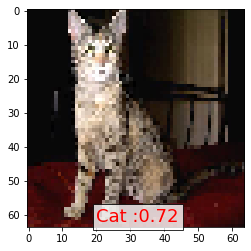

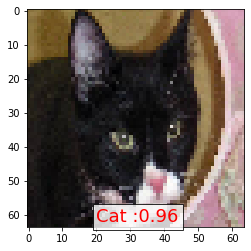

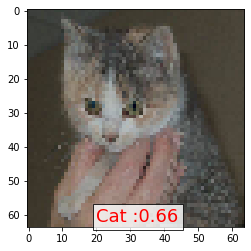

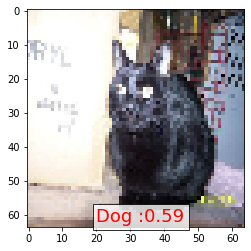

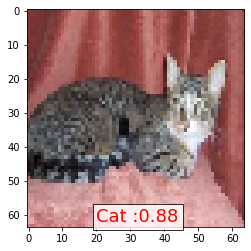

In [11]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
for i in range(5):
    img1 = image.load_img('test/cats/cat.{}.jpg'.format(10000+i), target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    # create a batch of size 1 [N,H,W,C]
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

    plt.imshow(img1)
    plt.show()
    



### Model Performance on Unseen Data

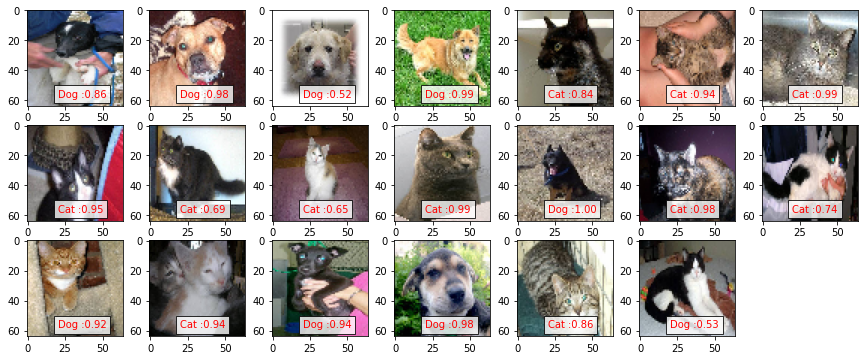

In [12]:
# for generator image set u can use 
# ypred = classifier.predict_generator(test_set)

fig=plt.figure(figsize=(15, 6))
columns = 7
rows = 3
for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img1 = image.load_img('Test1_20/{}.jpg'.format(i+1), target_size=(64, 64))
    img = image.img_to_array(img1)
    img = img/255
    img = np.expand_dims(img, axis=0)
    prediction = classifier.predict(img, batch_size=None,steps=1) #gives all class prob.
    if(prediction[:,:]>0.5):
        value ='Dog :%1.2f'%(prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    else:
        value ='Cat :%1.2f'%(1.0-prediction[0,0])
        plt.text(20, 58,value,color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(img1)


### Conclusion
The Architecture and parameter used in this network are capable of producing accuracy of **97.56%** on Validation Data which is pretty good. It is possible to Achieve more accuracy on this dataset using deeper network and fine tuning of network parameters for training. You can download this trained model from resource directory and Play with it. 